In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [33]:
# Training the Perceptron
#
# x:   feature data 
# y:   outputs 
# eta: learning rate
# epochs:   number of iterations

def perceptron_train(x, y, eta, epochs):
#     اضافه کردن یک ستون تمام یک به ابتدای داده ها
    ones = np.ones(x.shape[0]).reshape(x.shape[0], 1)
    X = np.append(ones, x, axis=1)
    w = np.zeros(X.shape[1])
    for epoch in range(epochs):
        for i, xi in enumerate(X):
            yi = y[i]
            a = np.dot(w,xi)
            if a > 0:
                yhat = 1.
            else:
                yhat = 0.
            w = w - eta*(yhat-yi)*xi
    return w

In [34]:
# AND gate features
#     x1  x2
x = [[0., 0.],                                  
     [0., 1.],                                 
     [1., 0.],                                  
     [1., 1.]] 
x = np.array(x)
# Desired outputs
y = [0.,                                            
     0.,                                            
     0.,                                            
     1.] 

In [37]:
ones = np.ones(x.shape[0]).reshape(x.shape[0], 1)
X = np.append(ones, x, axis=1)
X

array([[1., 0., 0.],
       [1., 0., 1.],
       [1., 1., 0.],
       [1., 1., 1.]])

In [35]:
w = perceptron_train(x, y, eta=0.1, epochs=10)
w

array([-0.2,  0.2,  0.1])

$$w_2x_2+w_1x_1+w_0x_0 = 0$$
به اختلاف شماره اندیس ها در بردارهای پایتون و نوتیشن ریاضی توجه داشته باشید
اندیس بردارها در برنامه‌نویسی از چپ به راست افزایش می‌باید:
$$\mathbf{x} = [x_0, x_1, x_2]$$
$$\mathbf{w} = [w_0, w_1, w_2]$$
گرچه که از هر طرف نوشته شوند، ضرب داخلی آنها یکی است، اما باید توجه داشته باشیم که در برنامه‌نویسی، مؤلفه‌ی اول متناظر با بایاس هست نه آخر.


In [26]:
# plot decision boundary orthogonal to w: w.x = 0
# w is w0, w1, w2, where w0 is bias.
def plot_decision_boundry(x, w):
    m = -w[1] / w[2]
    b = -w[0] / w[2]

    colours = ('green', 'magenta', 'blue', 'cyan', 'yellow', 'red')
    fig, ax = plt.subplots()
    for n_class in range(2):
        ax.scatter(x[y==n_class][:, 0], x[y==n_class][:, 1], 
                   c=colours[n_class], s=40, label=str(n_class))

    x_min = min(x[:, 0])
    x_max = max(x[:, 0])
    xx = [x_min, x_max]
    yy = [m*x_min+b, m*x_max+b]
    plt.plot(xx, yy, ':g')
    plt.show()

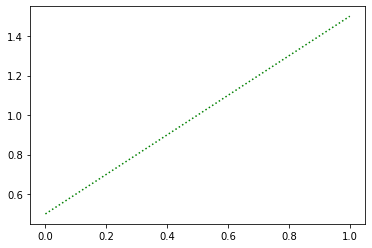

In [27]:
plot_decision_boundry(x, w)

In [28]:
from sklearn.datasets import make_blobs

n_samples = 250
x, y = make_blobs(n_samples=n_samples, 
                             centers=([3.5, 2.5], [6.7, 7.9]), 
                             random_state=0)

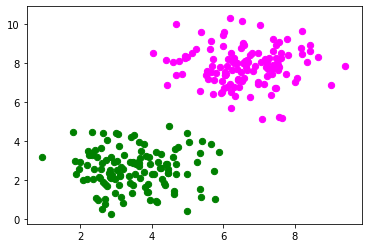

In [29]:
colours = ('green', 'magenta', 'blue', 'cyan', 'yellow', 'red')
fig, ax = plt.subplots()

for n_class in range(2):
    ax.scatter(x[y==n_class][:, 0], x[y==n_class][:, 1], 
               c=colours[n_class], s=40, label=str(n_class))

In [30]:
from sklearn.linear_model import Perceptron

# training the sklearn Perceptron
clf = Perceptron(random_state=None, eta0= 0.1, shuffle=True, fit_intercept=False)
# add bias to X's first column
ones = np.ones(x.shape[0]).reshape(x.shape[0], 1)
X = np.append(ones, x, axis=1)
clf.fit(X, y)

# y_predict = clf.predict(x)
w = clf.coef_[0]
print("sklearn weights:\n", w)
score = clf.score(X,y)
print("sklearn score:", score)

sklearn weights:
 [-6.20000000e+00  3.00268669e-03  1.25948734e+00]
sklearn score: 1.0


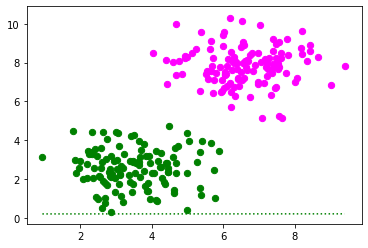

In [31]:
plot_decision_boundry(x, w)

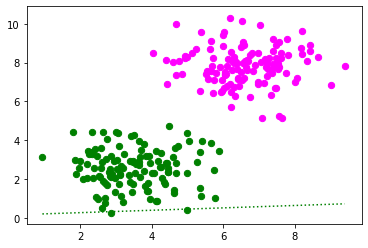

In [32]:
w = perceptron_train(x, y, eta=0.1, epochs=100)
plot_decision_boundry(x, w)